In [1]:
from pykonker.main.api import Client

In [2]:
import pandas as pd

In [3]:
konker = Client()

In [4]:
konker.login(cid='rdx')

connected


(<requests_oauthlib.oauth2_session.OAuth2Session at 0x7ff464bcc4a8>,
 {'access_token': 'eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJzY29wZSI6WyJ0cnVzdCIsInJlYWQiLCJ3cml0ZSJdLCJleHAiOjE5MTE2NjE3MjQsImF1dGhvcml0aWVzIjpbIkxJU1RfQUxFUlRfVFJJR0dFUlMiLCJSRU1PVkVfREVWSUNFX0NPTkZJRyIsIkVESVRfQUxFUlRfVFJJR0dFUiIsIkNSRUFURV9PQVVUSCIsIkxJU1RfTE9DQVRJT05TIiwiRURJVF9ERVZJQ0VfTU9ERUwiLCJTSE9XX0dBVEVXQVkiLCJBRERfVVNFUiIsIkNSRUFURV9MT0NBVElPTiIsIkxJU1RfREVWSUNFUyIsIlNIT1dfREVWSUNFX1JPVVRFIiwiRURJVF9UUkFOU0ZPUk1BVElPTiIsIlNIT1dfVFJBTlNGT1JNQVRJT04iLCJTSE9XX1JFU1RfREVTVElOQVRJT04iLCJDUkVBVEVfVFJBTlNGT1JNQVRJT04iLCJTSE9XX0FMRVJUX1RSSUdHRVIiLCJSRU1PVkVfREVWSUNFIiwiTE9HSU4iLCJWSUVXX0RFVklDRV9MT0ciLCJSRU1PVkVfUkVTVF9ERVNUSU5BVElPTiIsIlJFTU9WRV9ERVZJQ0VfTU9ERUwiLCJMT0dPVVQiLCJBRERfQVBQTElDQVRJT04iLCJTSE9XX1VTRVIiLCJMSVNUX0FQUExJQ0FUSU9OIiwiTUFSS19VU0VSX05PVElGSUNBVElPTl9BU19SRUFEIiwiTElTVF9VU0VSIiwiQ1JFQVRFX0RFVklDRV9ST1VURSIsIlNIT1dfREVWSUNFX01PREVMIiwiU0hPV19QUklWQVRFX1NUT1JBR0UiLCJSRU1PVkVfVVNFUiIsIlNIT1dfQVB

In [5]:
konker.set_application('globo')

In [6]:
devices = pd.json_normalize(konker.get_all_devices())

In [7]:
devices

,id,name,description,locationName,deviceModelName,active,debug,tags,guid
0,865083031014764,3,None,default,default,True,False,[],f6bef9f0-9cca-4cdd-9447-ce226ee90842
1,865083031013154,10,None,default,default,True,False,[],90a20c97-7572-48ee-a2fb-ca65298eff77
2,865083031015928,7,None,default,default,True,False,[],f34919f4-1462-4cdf-8fce-6a0db6caaecd
3,865083031016884,9,None,default,default,True,False,[],bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4
4,865083031015688,6,None,default,default,True,False,[],861ed2ef-9d61-435a-b09c-23ef8ee9a19b
5,865083031018088,5,None,default,default,True,False,[],d06066ed-2718-48b8-962b-c79a418b8b00
6,865083031027774,4,None,default,default,True,False,[],cd4a9505-dbd6-4227-a8b4-34e5cd8390e4
7,865083031017973,8,None,default,default,True,False,[],874b344e-123f-4c15-afb4-8a610aa2a06e
8,865083031014699,2,None,default,default,True,False,[],7f625eee-56f5-45f4-ac52-84155e2ec6a4
9,865083031017205,1,None,default,default,True,False,[],7609ce01-6b79-41dc-816a-35e51673ffa0


In [8]:
# data = pd.json_normalize(konker.read_data(guid='f6bef9f0-9cca-4cdd-9447-ce226ee90842'))

In [9]:
from scipy import spatial 


In [10]:
stops = pd.read_json('../server/src/data/bus-stops.json')

In [11]:
#stops_full = stops
#stops = stops_full[stops_full['line']=='VERDE']
#stops = stops_full

In [12]:
stops['line'].unique()

array(['VERDE', 'ROSA', 'AZUL', 'AMARELA'], dtype=object)

In [13]:
# sindex = spatial.KDTree(stops[['lat', 'long']])

In [14]:
# sindex

In [15]:
# data

In [16]:
# r = sindex.query(data[['geolocation.lat', 'geolocation.lon']])

In [17]:
# pd.DataFrame(r[0]).describe()

In [18]:
# pd.DataFrame(r[0]*6371000).describe()

In [19]:
# check if there's data files locally 
import os 
data = {}
delta = 60
for index, dev in devices.iterrows():
    file_name = './data/{}-{}.parquet'.format(dev['id'], delta)
    if os.path.isfile(file_name):
        # load data from local cache 
        print('loading {} from local cache...'.format(dev['id']))
        data[dev['id']] = pd.read_parquet(file_name)
    else:
        print('loading {} from KONKER platform'.format(dev['id']))
        # load data from the konker platform
        data[dev['id']] = pd.json_normalize(konker.read_data(guid=dev['guid'], delta=-delta))
        #
        # save data on the local cache 
        data[dev['id']].to_parquet(file_name)
 

loading 865083031014764 from local cache...
loading 865083031013154 from local cache...
loading 865083031015928 from local cache...
loading 865083031016884 from local cache...
loading 865083031015688 from local cache...
loading 865083031018088 from local cache...
loading 865083031027774 from local cache...
loading 865083031017973 from local cache...
loading 865083031014699 from local cache...
loading 865083031017205 from local cache...


In [20]:
#r = {}
#f = lambda x: stops.iloc[x]
#for ndx, dev in devices.iterrows():
#    _id = dev['id']
#    if len(data[_id]) > 0:
#        r[_id] = sindex.query(data[_id][['geolocation.lat', 'geolocation.lon']])
#        # translate to stops 
#        ss = f(r[_id][1])
#        # merge results on data
#        data[_id] = data[_id].merge(ss, left_index=True, right_index=True)
        

In [21]:
# r.keys()

In [22]:
# data['865083031014764'][data['865083031014764']['']]

In [23]:
# aux = data['865083031014764'].merge(f(r['865083031014764'][1]), left_index=True, right_index=True)

In [24]:
#aux.groupby(['incoming.deviceGuid', 'no']).count()

In [25]:
# r['865083031014764'][0]*6371000

In [26]:
# pd.DataFrame(np.transpose(r['865083031014764']))

In [27]:
#f = lambda x: stops.iloc[x]
#xxx = f(r['865083031014764'][1])

In [28]:
# data['865083031014764'].merge(xxx, left_index=True, right_index=True)

In [29]:
#alldist = []
#for k in r.keys():
#    alldist.append((r[k][0]*6371000).tolist())

In [30]:
#pd.DataFrame(alldist[0]).describe()

In [31]:
# reference KDTree AND BALL TREE
# https://towardsdatascience.com/using-scikit-learns-binary-trees-to-efficiently-find-latitude-and-longitude-neighbors-909979bd929b

In [32]:
import numpy as np

In [33]:
# transform columns of lat long in radians ... 

for column in stops[["lat", "long"]]:
    rad = np.deg2rad(stops[column].values)
    stops[f'{column}_rad'] = rad
for index, dev in devices.iterrows():
    _data = data[dev['id']]
    if len(_data) > 0:
        for column in _data[["geolocation.lat", "geolocation.lon"]]:
            rad = np.deg2rad(_data[column].values)
            _data[f'{column}_rad'] = rad


In [34]:
from sklearn.neighbors import BallTree, KDTree


In [35]:
stops[stops['line']=='ROSA']

,line,no,LATLONG,lat,long,name,lat_rad,long_rad
14,ROSA,1,"22°57'26.8""S 43°24'17.6""W",-22.957444,-43.404889,PORTARIA 3,-0.400683,-0.757558
15,ROSA,2,"22°57'25.7""S 43°24'23.2""W",-22.957139,-43.406444,PRAÇA MPS,-0.400678,-0.757585
16,ROSA,3,"22°57'25.1""S 43°24'27.5""W",-22.956972,-43.407639,PULMÃO,-0.400675,-0.757606
17,ROSA,4,"22°57'22.7""S 43°24'31.9""W",-22.956306,-43.408861,MAIS VC,-0.400663,-0.757628
18,ROSA,5,"22°57'27.2""S 43°24'26.0""W",-22.957556,-43.407222,PULMAO / BBB,-0.400685,-0.757599
19,ROSA,6,"22°57'29.1""S 43°24'23.9""W",-22.958083,-43.406639,MG3,-0.400694,-0.757589
20,ROSA,7,"22°57'29.7""S 43°24'21.8""W",-22.958250,-43.406056,MG1 - C/D,-0.400697,-0.757579
21,ROSA,8,"22°57'31.3""S 43°24'15.7""W",-22.958694,-43.404361,MG1 - A/B,-0.400705,-0.757549
22,ROSA,9,"22°57'31.0""S 43°24'12.4""W",-22.958611,-43.403444,MG4 - PRACA,-0.400703,-0.757533
23,ROSA,10,"22°57'25.3""S 43°24'06.7""W",-22.957028,-43.401861,PORTARIA 5 (CC3),-0.400676,-0.757505


In [36]:
data[list(data.keys())[0]].columns

Index(['timestamp', 'ingestedTimestamp', 'incoming.deviceGuid',
       'incoming.channel', 'geolocation.lat', 'geolocation.lon',
       'payload._lon', 'payload.gpsSignal', 'payload.distance',
       'payload.channel', 'payload.accuracy', 'payload.gpsSpeed',
       'payload._lat', 'payload.battery', 'payload.deviceId',
       'payload.protocol', 'payload.gsmSignal', 'payload.imei',
       'payload.serverTime', 'payload.totalDistance', 'payload.attr.hdop',
       'payload.attr.power', 'payload.attr.odometer',
       'payload.attr.batteryLevel', 'payload.attr.ignition',
       'payload.attr.input', 'payload.attr.output', 'payload.attr.rpm',
       'payload.attr.fuel', 'payload.attr.type', 'payload.attr.distance',
       'payload.attr.totalDistance', 'payload.attr.imei', 'payload._ts',
       'payload.height', 'payload.direction', 'payload.attr.alarm',
       'geolocation.lat_rad', 'geolocation.lon_rad'],
      dtype='object')

In [37]:
#ball = BallTree(stops[["lat_rad", "long_rad"]].values, metric='haversine')
balldata = stops[stops['line']=='AMARELA']
ball = BallTree(balldata[["lat_rad", "long_rad"]].values, metric='haversine')


In [38]:
#data['865083031015928'] = data['865083031015928'].drop(columns='stop')

In [39]:
for k in data.keys():
    print('{} => {}'.format(k, len(data[k].columns)))
    try:
        data[k] = data[k].drop(columns='stop#')
    except:
        None

865083031014764 => 39
865083031013154 => 39
865083031015928 => 39
865083031016884 => 39
865083031015688 => 39
865083031018088 => 39
865083031027774 => 39
865083031017973 => 39
865083031014699 => 39
865083031017205 => 0


In [40]:
# computa as distancias com os pontos de parada mais proximos delas ... usando o BallTree 

data2 = {}
for k in data.keys(): 
    if len(data[k]) > 0:
        distances, indices = ball.query(data[k][["geolocation.lat_rad", "geolocation.lon_rad"]].values)
        data2[k] = pd.DataFrame(data[k])
        data2[k]['distance'] = np.transpose(distances*6371000)[0]
        #data2[k]['stop#'] = np.transpose(indices)[0]
        data2[k] = pd.concat([data2[k].reset_index().rename(columns={'index':'index1'}), balldata.iloc[np.transpose(indices)[0]].reset_index().rename(columns={'index':'index2'})], axis=1)


In [41]:
#distances, indices 
data2['865083031014764']
#stops.iloc[12]
#balldata.iloc[12]

,index1,timestamp,ingestedTimestamp,incoming.deviceGuid,incoming.channel,geolocation.lat,geolocation.lon,payload._lon,payload.gpsSignal,payload.distance,...,distance,index2,line,no,LATLONG,lat,long,name,lat_rad,long_rad
0,0,2020-12-05T20:58:24Z,2020-12-07T15:06:03.149Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961783,-43.406777,-43.406777,-1,515.10,...,122.708127,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
1,1,2020-12-05T20:58:24Z,2020-12-07T15:06:49.124Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961783,-43.406777,-43.406777,-1,515.10,...,122.708127,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
2,2,2020-12-05T20:58:24Z,2020-12-07T15:04:21.033Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961783,-43.406777,-43.406777,-1,515.10,...,122.708127,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
3,3,2020-12-05T20:58:24Z,2020-12-07T15:04:06.134Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961783,-43.406777,-43.406777,-1,515.10,...,122.708127,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
4,4,2020-12-05T20:58:24Z,2020-12-05T20:58:33.331Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961783,-43.406777,-43.406777,-1,0.00,...,122.708127,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107905,107905,2021-02-02T10:18:20Z,2021-02-02T10:18:31.472Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961803,-43.407012,-43.407012,-1,9.51,...,115.687440,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
107906,107906,2021-02-02T10:18:11Z,2021-02-02T10:18:21.489Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961742,-43.407077,-43.407077,-1,0.00,...,107.384332,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
107907,107907,2021-02-02T10:18:11Z,2021-02-02T10:18:12.484Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961742,-43.407077,-43.407077,-1,5.79,...,107.384332,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601
107908,107908,2021-02-02T10:18:08Z,2021-02-02T10:18:11.640Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.961690,-43.407078,-43.407078,-1,23.25,...,101.761001,50,AMARELA,2,"22°57'38.9""S 43°24'26.4""W",-22.960806,-43.407333,FÁBRICA DE CENÁRIOS,-0.400742,-0.757601


In [42]:
# pd.DataFrame([[1,2],[3,4]], columns=['b', 'b']).rename(columns={'b':'C'})

In [43]:
# ajuste temporatio ... 
for k in data2.keys():
    print('{} => {}'.format(k, len(data2[k].columns)))
    try:
        data2[k] = data2[k].drop(columns='stop#')
    except:
        None

865083031014764 => 50
865083031013154 => 50
865083031015928 => 50
865083031016884 => 50
865083031015688 => 50
865083031018088 => 50
865083031027774 => 50
865083031017973 => 50
865083031014699 => 50


In [44]:
def reduceall(d, limit=3):
    v = []
    ks = []
    for k in d.keys():
        x = pd.DataFrame(d[k][d[k]['distance']<limit])
        x['DEVICE']=k
        v.append(x)
    _v = pd.concat(v)
    return _v

def reduceoutOfStops(d, time=1):
    v = []
    for k in d.keys():
        x = pd.DataFrame(d[k][d[k]['payload.gpsSpeed']==0])
        x['DEVICE'] = k
        v.append(x)
    _v = pd.concat(v)
    return _v


# identifica os pontos de parada que tem uma distancia max de 3 metros do ponto definido 'fisicamente' como parada ...

reduceall(data2,3)[['geolocation.lat', 'geolocation.lon','lat','long','distance', 'incoming.deviceGuid']]

#data2['865083031014764'][data2['865083031014764']['distance']<15].groupby('name').count()

,geolocation.lat,geolocation.lon,lat,long,distance,incoming.deviceGuid
55,-22.959592,-43.405872,-22.959611,-43.405861,2.399752,f6bef9f0-9cca-4cdd-9447-ce226ee90842
273,-22.958577,-43.405792,-22.958556,-43.405806,2.759022,f6bef9f0-9cca-4cdd-9447-ce226ee90842
274,-22.958577,-43.405792,-22.958556,-43.405806,2.759022,f6bef9f0-9cca-4cdd-9447-ce226ee90842
2755,-22.958550,-43.405807,-22.958556,-43.405806,0.635206,f6bef9f0-9cca-4cdd-9447-ce226ee90842
2958,-22.958683,-43.405832,-22.958694,-43.405806,2.991706,f6bef9f0-9cca-4cdd-9447-ce226ee90842
...,...,...,...,...,...,...
72519,-22.959630,-43.405855,-22.959611,-43.405861,2.191565,7f625eee-56f5-45f4-ac52-84155e2ec6a4
72520,-22.959630,-43.405855,-22.959611,-43.405861,2.191565,7f625eee-56f5-45f4-ac52-84155e2ec6a4
72521,-22.959630,-43.405855,-22.959611,-43.405861,2.191565,7f625eee-56f5-45f4-ac52-84155e2ec6a4
72528,-22.958698,-43.405830,-22.958694,-43.405806,2.533822,7f625eee-56f5-45f4-ac52-84155e2ec6a4


In [45]:
reduceall(data2,3).groupby(['incoming.deviceGuid', 'name']).count()


index1  timestamp  \
incoming.deviceGuid                  name                                     
7f625eee-56f5-45f4-ac52-84155e2ec6a4 EIXO 300 - MG1            1          1   
                                     FÁBRICA DE CENÁRIOS       2          2   
                                     GIRAFAS                   4          4   
                                     KOPENHAGEN               29         29   
                                     MG1 - A/B                 1          1   
...                                                          ...        ...   
f6bef9f0-9cca-4cdd-9447-ce226ee90842 MG2                      17         17   
                                     MG3                      31         31   
                                     PORTARIA 2               46         46   
                                     PORTARIA 3               38         38   
                                     PRAÇA DOS MPS             7          7   

                                                          ingestedTimestamp  \
incoming.deviceGuid                  name                                     
7f625eee-56f5-45f4-ac52-84155e2ec6a4 EIXO 300 - MG1                       1   
                                     FÁBRICA DE CENÁRIOS                  2   
                                     GIRAFAS                              4   
                                     KOPENHAGEN                          29   
                                     MG1 - A/B                            1   
...                                                                     ...   
f6bef9f0-9cca-4cdd-9447-ce226ee90842 MG2                                 17   
                                     MG3                                 31   
                                     PORTARIA 2                          46   
                                     PORTARIA 3                          38   
                                     PRAÇA DOS MPS                        7   

                                                          incoming.channel  \
incoming.deviceGuid                  name                                    
7f625eee-56f5-45f4-ac52-84155e2ec6a4 EIXO 300 - MG1                      1   
                                     FÁBRICA DE CENÁRIOS                 2   
                                     GIRAFAS                             4   
                                     KOPENHAGEN                         29   
                                     MG1 - A/B                           1   
...                                                                    ...   
f6bef9f0-9cca-4cdd-9447-ce226ee90842 MG2                                17   
                                     MG3                                31   
                                     PORTARIA 2                         46   
                                     PORTARIA 3                         38   
                                     PRAÇA DOS MPS                       7   

                                                          geolocation.lat  \
incoming.deviceGuid                  name                                   
7f625eee-56f5-45f4-ac52-84155e2ec6a4 EIXO 300 - MG1                     1   
                                     FÁBRICA DE CENÁRIOS                2   
                                     GIRAFAS                            4   
                                     KOPENHAGEN                        29   
                                     MG1 - A/B                          1   
...                                                                   ...   
f6bef9f0-9cca-4cdd-9447-ce226ee90842 MG2                               17   
                                     MG3                               31   
                                     PORTARIA 2                        46   
                                     PORTARIA 3                        38   
                                     PRAÇA DOS MPS             

In [46]:
def haversine(lat1, lon1, lat2, lon2):
    # MILES = 3959
    RADIUS  = 6371000
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_distance = RADIUS * c
    return total_distance



In [47]:
haversine(-22.958537,-43.405805,-22.958556,-43.405806)

2.1151831129494028

In [48]:
reduceall(data2,3)

,index1,timestamp,ingestedTimestamp,incoming.deviceGuid,incoming.channel,geolocation.lat,geolocation.lon,payload._lon,payload.gpsSignal,payload.distance,...,index2,line,no,LATLONG,lat,long,name,lat_rad,long_rad,DEVICE
55,55,2020-12-05T20:54:01Z,2020-12-05T20:54:06.359Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.959592,-43.405872,-43.405872,-1,17.80,...,60,AMARELA,12,"22°57'34.6""S 43°24'21.1""W",-22.959611,-43.405861,MG2,-0.400721,-0.757575,865083031014764
273,273,2020-12-05T20:29:34Z,2020-12-05T20:29:35.700Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.958577,-43.405792,-43.405792,-1,17.69,...,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574,865083031014764
274,274,2020-12-05T20:29:34Z,2020-12-05T20:29:42.993Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.958577,-43.405792,-43.405792,-1,0.00,...,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574,865083031014764
2755,2755,2020-12-04T18:28:34Z,2020-12-04T18:28:59.126Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.958550,-43.405807,-43.405807,-1,40.02,...,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574,865083031014764
2958,2958,2020-12-04T11:44:40Z,2020-12-04T11:44:47.769Z,f6bef9f0-9cca-4cdd-9447-ce226ee90842,location,-22.958683,-43.405832,-43.405832,-1,0.00,...,53,AMARELA,5,"22°57'31.3""S 43°24'20.9""W",-22.958694,-43.405806,KOPENHAGEN,-0.400705,-0.757574,865083031014764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72519,72519,2021-01-25T16:32:48Z,2021-01-25T16:32:49.418Z,7f625eee-56f5-45f4-ac52-84155e2ec6a4,location,-22.959630,-43.405855,-43.405855,-1,24.48,...,60,AMARELA,12,"22°57'34.6""S 43°24'21.1""W",-22.959611,-43.405861,MG2,-0.400721,-0.757575,865083031014699
72520,72520,2021-01-25T16:32:48Z,2021-01-25T16:32:50.077Z,7f625eee-56f5-45f4-ac52-84155e2ec6a4,location,-22.959630,-43.405855,-43.405855,-1,0.00,...,60,AMARELA,12,"22°57'34.6""S 43°24'21.1""W",-22.959611,-43.405861,MG2,-0.400721,-0.757575,865083031014699
72521,72521,2021-01-25T16:32:48Z,2021-01-25T16:32:56.806Z,7f625eee-56f5-45f4-ac52-84155e2ec6a4,location,-22.959630,-43.405855,-43.405855,-1,0.00,...,60,AMARELA,12,"22°57'34.6""S 43°24'21.1""W",-22.959611,-43.405861,MG2,-0.400721,-0.757575,865083031014699
72528,72528,2021-01-25T16:32:21Z,2021-01-25T16:32:31.624Z,7f625eee-56f5-45f4-ac52-84155e2ec6a4,location,-22.958698,-43.405830,-43.405830,-1,10.57,...,53,AMARELA,5,"22°57'31.3""S 43°24'20.9""W",-22.958694,-43.405806,KOPENHAGEN,-0.400705,-0.757574,865083031014699


In [49]:
# analise do tempo de parada entre pontos de uma mesma linha 
dfx  = reduceall(data2,3).drop_duplicates(['geolocation.lat', 'geolocation.lon', 'distance', 'name', 'incoming.deviceGuid'])

In [50]:
#dfx['incoming.deviceGuid'].unique()

In [51]:
# analise do tempo ... 
# ao inves de considerar linhas, considera os veiculos (já que nao se tem a informacao de qual linha estão fazendo nesse momento)
#
import arrow 
dfx
dfx['ts'] = dfx.apply(lambda x: arrow.get(x['timestamp']).to('America/Sao_Paulo'), axis=1)
#dfx[dfx['line']=='VERDE'].sort_values('ts')
dfx[dfx['incoming.deviceGuid']=='f6bef9f0-9cca-4cdd-9447-ce226ee90842'].sort_values('ts')[['ts', 'line', 'name']]

,ts,line,name
2958,2020-12-04T08:44:40-03:00,AMARELA,KOPENHAGEN
2755,2020-12-04T15:28:34-03:00,AMARELA,KOPENHAGEN
273,2020-12-05T17:29:34-03:00,AMARELA,KOPENHAGEN
55,2020-12-05T17:54:01-03:00,AMARELA,MG2
3856,2020-12-07T13:32:18-03:00,AMARELA,KOPENHAGEN
...,...,...,...
106484,2021-02-01T11:26:09-03:00,AMARELA,KOPENHAGEN
106444,2021-02-01T11:29:24-03:00,AMARELA,KOPENHAGEN
105648,2021-02-01T18:18:13-03:00,AMARELA,PRAÇA DOS MPS
107789,2021-02-02T12:54:33-03:00,AMARELA,PORTARIA 2


In [52]:
#identifica os pontos de parada oficiosos dentro do contexto da globo
#

from sklearn.cluster import KMeans
import numpy as np

pts_nao_oficiais = reduceoutOfStops(data2,1).drop_duplicates(['geolocation.lat','geolocation.lon'])[['geolocation.lat','geolocation.lon', 'distance','line', 'no', 'incoming.deviceGuid']]
df = pd.DataFrame(pts_nao_oficiais)
kmeans = KMeans(n_clusters=20, random_state=0).fit(pts_nao_oficiais[['geolocation.lat','geolocation.lon']])
df['x'] = kmeans.labels_
df.groupby('x').agg(['max','count'])

geolocation.lat       geolocation.lon           distance           line  \
               max count             max count          max count      max   
x                                                                            
0       -22.956438  3193      -43.404098  3193   120.032701  3193  AMARELA   
1       -22.960202  1841      -43.404852  1841   126.210440  1841  AMARELA   
2       -22.956445  2861      -43.399128  2861   589.965446  2861  AMARELA   
3       -22.955252  3634      -43.401947  3634   368.272261  3634  AMARELA   
4       -22.958500  1522      -43.402365  1522   358.707841  1522  AMARELA   
5       -22.956807  1956      -43.406148  1956   225.938317  1956  AMARELA   
6       -22.961183  4847      -43.406222  4847   201.057973  4847  AMARELA   
7       -22.959978  2018      -43.399897  2018   587.896437  2018  AMARELA   
8       -22.959348   546      -43.396805   546   862.530661   546  AMARELA   
9       -22.956943  2000      -43.405035  2000    84.686131  2000  AMARELA   
10      -22.955017  3544      -43.402702  3544   336.953054  3544  AMARELA   
11      -22.956155  2697      -43.401038  2697   400.984302  2697  AMARELA   
12      -22.957910   829      -43.399862   829   578.598218   829  AMARELA   
13      -22.955572  1113      -43.406957  1113  2292.977901  1113  AMARELA   
14      -22.958647   721      -43.405210   721    84.423632   721  AMARELA   
15      -22.957652  1639      -43.401950  1639   328.828332  1639  AMARELA   
16      -22.961802  1104      -43.404080  1104   612.283840  1104  AMARELA   
17      -22.957472  1068      -43.403533  1068   192.898824  1068  AMARELA   
18      -22.959133   348      -43.406835   348   240.861056   348  AMARELA   
19      -22.957170   104      -43.397480   104   758.608890   104  AMARELA   

          no                         incoming.deviceGuid        
   count max count                                   max count  
x                                                               
0   3193   7  3193  f6bef9f0-9cca-4cdd-9447-ce226ee90842  3193  
1   1841  12  1841  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1841  
2   2861   6  2861  f6bef9f0-9cca-4cdd-9447-ce226ee90842  2861  
3   3634   6  3634  f6bef9f0-9cca-4cdd-9447-ce226ee90842  3634  
4   1522  12  1522  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1522  
5   1956   9  1956  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1956  
6   4847   2  4847  f6bef9f0-9cca-4cdd-9447-ce226ee90842  4847  
7   2018   1  2018  f6bef9f0-9cca-4cdd-9447-ce226ee90842  2018  
8    546   6   546  f6bef9f0-9cca-4cdd-9447-ce226ee90842   546  
9   2000  11  2000  f6bef9f0-9cca-4cdd-9447-ce226ee90842  2000  
10  3544   6  3544  f6bef9f0-9cca-4cdd-9447-ce226ee90842  3544  
11  2697   6  2697  f6bef9f0-9cca-4cdd-9447-ce226ee90842  2697  
12   829   6   829  f6bef9f0-9cca-4cdd-9447-ce226ee90842   829  
13  1113   8  1113  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1113  
14   721  12   721  f6bef9f0-9cca-4cdd-9447-ce226ee90842   721  
15  1639   6  1639  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1639  
16  1104   1  1104  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1104  
17  1068  12  1068  f6bef9f0-9cca-4cdd-9447-ce226ee90842  1068  
18   348   3   348  f6bef9f0-9cca-4cdd-9447-ce226ee90842   348  
19   104   6   104  f34919f4-1462-4cdf-8fce-6a0db6caaecd   104

In [53]:
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles, AntPath,
    Circle, Marker, Rectangle, LayerGroup, LayersControl
)
from ipywidgets import HTML



# l = list(data.apply(lambda x: [stops[0]['lat'], stops[0]['long']], axis=1))

m = Map(center=list(stops.iloc[0][['lat', 'long']]), zoom=17)

ant_path = AntPath(
  #  locations=l,
    dash_array=[1, 10],
    delay=1000,
    color='#7590ba',
    pulse_color='#3f6fba'
)

m.layout.width = '100%'
m.layout.height = '800px'

# m.add_layer(ant_path)

#all_pts = {}
#for kx in data2.keys():
#    all_pts[kx] = data2[kx][(data2[kx]['distance']<3) & (data2[kx]['payload.gpsSpeed']>=0)][['timestamp', 'geolocation.lat', 'geolocation.lon', 'payload.gpsSpeed', 'line', 'no', 'lat', 'long', 'name', 'distance', 'incoming.deviceGuid']]
#    all_pts[kx]['DEVICE']=kx
#    # pts = data2['865083031014764'][(data2['865083031014764']['distance']<5) & (data2['865083031014764']['payload.gpsSpeed']==0)][['timestamp', 'geolocation.lat', 'geolocation.lon', 'payload.gpsSpeed', 'line', 'no', 'lat', 'long', 'name', 'distance']]
#
#pts = pd.concat(all_pts)
pts = reduceall(data2,3).drop_duplicates(['geolocation.lat', 'geolocation.lon', 'distance', 'name'])

# colors for distinct devices 
device_color_index = {}
device_color_index['color'] = {'red':120, 'green':120, 'blue':0}
def get_device_color(id):
    if id not in device_color_index:
        c = device_color_index['color'] 
        c['blue'] = c['blue'] + 20
        device_color_index['color'] = c
        device_color_index[id] = '#{:02x}{:02x}{:02x}'.format(c['red'], c['green'], c['blue'])
    # print('{} => {}'.format(id, device_color_index[id]))
    return device_color_index[id]
    
lgs = {} 

for i,v in pts.iterrows():
    if v['DEVICE'] not in lgs:
        lgs[v['DEVICE']] = LayerGroup(name=v['DEVICE'])
        lgs['{}-stop'.format(v['DEVICE'])] = LayerGroup(name='{}-STOP'.format(v['DEVICE']))
    lg = lgs[v['DEVICE']]
    lg_stop = lgs['{}-stop'.format(v['DEVICE'])]
    if (len(lg.layers) < 100):
        cx=Circle(location=(v['geolocation.lat'], v['geolocation.lon']), radius=10, color=get_device_color(v['DEVICE']))
        lg.add_layer(cx)
        p = HTML()
        p.value = '{} - {}/{} - {}'.format(v['DEVICE'], v['name'], v['line'], v['distance'])
        cx.popup=p
    if v['payload.gpsSpeed']==0:
        if (len(lg_stop.layers) < 100):
            cx=Circle(location=(v['geolocation.lat'], v['geolocation.lon']), radius=10, color=get_device_color(v['DEVICE']))
            lg_stop.add_layer(cx)
            p = HTML()
            p.value = 'STOPPED {} - {}/{} - {}'.format(v['DEVICE'], v['name'], v['line'], v['distance'])
            cx.popup=p
    

for idx in lgs:
    print('adding layer group {}'.format(idx))
    m.add_layer(lgs[idx])

colors={
    'VERDE':'green',
    'AMARELA':'yellow',
    'ROSA':'red',
    'AZUL':'black'
}
_radius = {
    'VERDE':6,
    'AMARELA':4,
    'ROSA':5,
    'AZUL':3
}

lg2 = LayerGroup(name='OFICIAL_POINTS')
for i,v in stops.iterrows():
    cx=Circle(location=(v['lat'], v['long']), radius=_radius[v['line']], fill_color=colors[v['line']], color=colors[v['line']])
    lg2.add_layer(cx)
    p = HTML()
    p.value = '{} | {}'.format(v['name'], v['line'])
    cx.popup=p
    
    
m.add_layer(lg2)

lg3 = LayerGroup(name='NON_OFICIAL_POINTS')
for i,v in df.groupby('x').max().iterrows():
    cx=Circle(location=(v[0], v[1]), radius=5, fill_color='lightgreen', color='black', weight=2, fill_opacity=1)
    lg3.add_layer(cx)
    p = HTML()
    p.value = '{} | {}'.format(v[0], v[1])
    cx.popup=p
    
m.add_layer(lg3)

control = LayersControl(position='topright')
m.add_control(control)

m

adding layer group 865083031014764
adding layer group 865083031014764-stop
adding layer group 865083031013154
adding layer group 865083031013154-stop
adding layer group 865083031015928
adding layer group 865083031015928-stop
adding layer group 865083031016884
adding layer group 865083031016884-stop
adding layer group 865083031015688
adding layer group 865083031015688-stop
adding layer group 865083031018088
adding layer group 865083031018088-stop
adding layer group 865083031027774
adding layer group 865083031027774-stop
adding layer group 865083031017973
adding layer group 865083031017973-stop
adding layer group 865083031014699
adding layer group 865083031014699-stop


Map(center=[-22.9611388888889, -43.4056388888889], controls=(ZoomControl(options=['position', 'zoom_in_text', …

array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

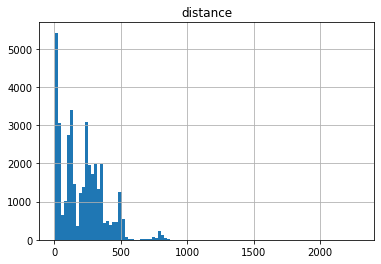

In [54]:
reduceoutOfStops(data2,1).drop_duplicates(['geolocation.lat','geolocation.lon'])[['geolocation.lat','geolocation.lon', 'distance','line', 'no']][['distance']].hist(bins=100)

In [55]:
len(pts_nao_oficiais)

37585

In [56]:
#classifica os pontos em clusters próximos, para identificar onde sao os pontos oficiosos de parada 



In [57]:
# kd_tree = KDTree(points)


In [58]:
#for kx in data2.keys():
#    print(data2[kx][data2[kx]['distance']<3]['distance'].describe())

In [59]:
data2['865083031014764'].columns

Index(['index1', 'timestamp', 'ingestedTimestamp', 'incoming.deviceGuid',
       'incoming.channel', 'geolocation.lat', 'geolocation.lon',
       'payload._lon', 'payload.gpsSignal', 'payload.distance',
       'payload.channel', 'payload.accuracy', 'payload.gpsSpeed',
       'payload._lat', 'payload.battery', 'payload.deviceId',
       'payload.protocol', 'payload.gsmSignal', 'payload.imei',
       'payload.serverTime', 'payload.totalDistance', 'payload.attr.hdop',
       'payload.attr.power', 'payload.attr.odometer',
       'payload.attr.batteryLevel', 'payload.attr.ignition',
       'payload.attr.input', 'payload.attr.output', 'payload.attr.rpm',
       'payload.attr.fuel', 'payload.attr.type', 'payload.attr.distance',
       'payload.attr.totalDistance', 'payload.attr.imei', 'payload._ts',
       'payload.height', 'payload.direction', 'payload.attr.alarm',
       'geolocation.lat_rad', 'geolocation.lon_rad', 'distance', 'index2',
       'line', 'no', 'LATLONG', 'lat', 'long', 'name'

In [60]:

pts = data2['865083031014764'][(data2['865083031014764']['distance']<5) & (data2['865083031014764']['payload.gpsSpeed']==0)][['timestamp', 'geolocation.lat', 'geolocation.lon', 'payload.gpsSpeed', 'line', 'no', 'lat', 'long', 'name', 'distance']]


In [61]:
pts

,timestamp,geolocation.lat,geolocation.lon,payload.gpsSpeed,line,no,lat,long,name,distance
6314,2020-12-12T02:05:16Z,-22.957487,-43.404893,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.750647
6315,2020-12-12T02:05:13Z,-22.957485,-43.404897,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.585404
9979,2020-12-10T22:39:34Z,-22.957452,-43.404853,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,3.769400
9980,2020-12-10T22:39:34Z,-22.957452,-43.404853,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,3.769400
9981,2020-12-10T22:39:25Z,-22.957452,-43.404853,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,3.769400
...,...,...,...,...,...,...,...,...,...,...
107699,2021-02-02T16:04:22Z,-22.957483,-43.404867,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.837633
107700,2021-02-02T16:04:13Z,-22.957483,-43.404867,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.837633
107701,2021-02-02T16:04:13Z,-22.957483,-43.404867,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.837633
107702,2021-02-02T16:04:01Z,-22.957483,-43.404867,0.0,AMARELA,6,-22.957444,-43.404889,PORTARIA 3,4.837633


In [62]:
for i,v in pts.iterrows():
    Circle(location=(v['geolocation.lat'], v['geolocation.lon']))

In [63]:
data2['865083031014764'].columns

Index(['index1', 'timestamp', 'ingestedTimestamp', 'incoming.deviceGuid',
       'incoming.channel', 'geolocation.lat', 'geolocation.lon',
       'payload._lon', 'payload.gpsSignal', 'payload.distance',
       'payload.channel', 'payload.accuracy', 'payload.gpsSpeed',
       'payload._lat', 'payload.battery', 'payload.deviceId',
       'payload.protocol', 'payload.gsmSignal', 'payload.imei',
       'payload.serverTime', 'payload.totalDistance', 'payload.attr.hdop',
       'payload.attr.power', 'payload.attr.odometer',
       'payload.attr.batteryLevel', 'payload.attr.ignition',
       'payload.attr.input', 'payload.attr.output', 'payload.attr.rpm',
       'payload.attr.fuel', 'payload.attr.type', 'payload.attr.distance',
       'payload.attr.totalDistance', 'payload.attr.imei', 'payload._ts',
       'payload.height', 'payload.direction', 'payload.attr.alarm',
       'geolocation.lat_rad', 'geolocation.lon_rad', 'distance', 'index2',
       'line', 'no', 'LATLONG', 'lat', 'long', 'name'

In [64]:
data2['865083031016884'][(data2['865083031016884']['distance']<3) & (data2['865083031016884']['name'].str.contains('KOPE'))]

,index1,timestamp,ingestedTimestamp,incoming.deviceGuid,incoming.channel,geolocation.lat,geolocation.lon,payload._lon,payload.gpsSignal,payload.distance,...,distance,index2,line,no,LATLONG,lat,long,name,lat_rad,long_rad
9141,9141,2020-12-08T17:07:25Z,2020-12-08T17:07:27.475Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958677,-43.405813,-43.405813,-1,16.77,...,2.084115,53,AMARELA,5,"22°57'31.3""S 43°24'20.9""W",-22.958694,-43.405806,KOPENHAGEN,-0.400705,-0.757574
9142,9142,2020-12-08T17:07:25Z,2020-12-08T17:07:33.946Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958677,-43.405813,-43.405813,-1,0.00,...,2.084115,53,AMARELA,5,"22°57'31.3""S 43°24'20.9""W",-22.958694,-43.405806,KOPENHAGEN,-0.400705,-0.757574
9781,9781,2020-12-08T15:44:38Z,2020-12-08T15:44:44.583Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958563,-43.405802,-43.405802,-1,24.82,...,0.904297,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
9914,9914,2020-12-08T15:28:38Z,2020-12-08T15:36:30.763Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958555,-43.405777,-43.405777,-1,299.70,...,2.924366,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
10635,10635,2020-12-11T20:52:39Z,2020-12-11T22:23:15.910Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958565,-43.405807,-43.405807,-1,352.20,...,1.060537,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110481,110481,2021-02-01T19:37:47Z,2021-02-01T19:37:56.064Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958555,-43.405787,-43.405787,-1,44.91,...,1.900849,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
111100,111100,2021-02-01T18:32:41Z,2021-02-01T18:32:42.497Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958560,-43.405777,-43.405777,-1,32.90,...,2.965187,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
111101,111101,2021-02-01T18:32:41Z,2021-02-01T18:32:45.656Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958560,-43.405777,-43.405777,-1,0.00,...,2.965187,59,AMARELA,11,"22°57'30.8""S 43°24'20.9""W",-22.958556,-43.405806,KOPENHAGEN,-0.400702,-0.757574
113142,113142,2021-02-02T04:52:17Z,2021-02-02T04:52:18.703Z,bcb806e4-3ac6-45cf-99d7-c3b0a79da3a4,location,-22.958683,-43.405798,-43.405798,-1,43.83,...,1.489248,53,AMARELA,5,"22°57'31.3""S 43°24'20.9""W",-22.958694,-43.405806,KOPENHAGEN,-0.400705,-0.757574


In [65]:
haversine(-22.958556,-43.405806,-22.959983	,-43.400175	)

597.9742518579752

In [66]:
import networkx as nx


In [67]:
dfx[['line','name']]

,line,name
55,AMARELA,MG2
273,AMARELA,KOPENHAGEN
2755,AMARELA,KOPENHAGEN
2958,AMARELA,KOPENHAGEN
3267,AMARELA,KOPENHAGEN
...,...,...
69174,AMARELA,KOPENHAGEN
69227,AMARELA,GIRAFAS
72519,AMARELA,MG2
72528,AMARELA,KOPENHAGEN


In [73]:
dt_ = arrow.get('2021-01-01')
df_general = pd.DataFrame()
for dev_ in list(dfx['DEVICE'].unique()): 
    s_values = []
    s_index = []
    for dx in range(0,30):
        dti = dt_.shift(days=dx)

        #path = dfx[ (dfx['DEVICE']==dev_) & (dfx['ts']>=dti) & (dfx['ts']<dti.shift(days=1)) & (dfx['payload.gpsSpeed']==0)].sort_values('ts')
        path = dfx[ (dfx['DEVICE']==dev_) & (dfx['ts']>=dti) & (dfx['ts']<dti.shift(days=1))].sort_values('ts')

        dfx['next_node'] = path.shift(-1)['no']
        dfx['delta_ts'] = path.shift(-1)['ts'] - path['ts']

        # print('{} x {} => {}'.format(dev_, dti, list(path[['no']].drop_duplicates()['no'])))
        s_index.append(dti)
        s_values.append(list(path[['no']].drop_duplicates()['no']))
    print('processing {}'.format(dev_))
    s_ = pd.Series(s_values, index=s_index)
    df_general[dev_] = s_
        


processing 865083031014764
processing 865083031013154
processing 865083031015928
processing 865083031016884
processing 865083031015688
processing 865083031018088
processing 865083031027774
processing 865083031017973
processing 865083031014699


In [74]:
df_general

,865083031014764,865083031013154,865083031015928,865083031016884,865083031015688,865083031018088,865083031027774,865083031017973,865083031014699
2021-01-01T00:00:00+00:00,[],[],[],[],[],[],[],[],[]
2021-01-02T00:00:00+00:00,[],[],[],[],[],[],[],[],[]
2021-01-03T00:00:00+00:00,[],[],[],[],[],[],[],[],[]
2021-01-04T00:00:00+00:00,[],[11],[1],[],[],[],[8],[8],"[11, 12, 1]"
2021-01-05T00:00:00+00:00,[],[5],"[6, 1, 12]",[],[],"[11, 1, 5]",[],"[1, 6, 11, 12, 5]",[]
2021-01-06T00:00:00+00:00,[5],"[12, 11, 5]","[11, 12, 5, 1]","[8, 1, 11]","[1, 5]","[1, 11]","[12, 11]","[5, 1, 7]","[5, 12]"
2021-01-07T00:00:00+00:00,"[6, 11]","[3, 6, 7, 8]","[12, 5]","[5, 11, 1]","[2, 5, 7, 12]","[11, 1, 5]","[11, 1, 2]",[],[]
2021-01-08T00:00:00+00:00,"[8, 11, 1, 5]","[1, 11, 5]","[1, 8]","[4, 1, 7, 6, 8]",[],"[1, 5, 12]","[1, 11]","[5, 1]",[]
2021-01-09T00:00:00+00:00,"[12, 1]","[1, 6]",[11],"[6, 7, 12, 5, 8]",[],"[5, 1, 8]",[],[11],[]
2021-01-10T00:00:00+00:00,"[6, 11, 12, 2]",[],[],[],[],[],[],[12],[]


In [75]:
G = nx.DiGraph()

# adiciona os pontos que foram utilizados pela linha nesse periodo ... 
G.add_nodes_from(list(path[['no']].drop_duplicates()['no']))


In [92]:
df_general.values.flatten()

array([list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([11]), list([1]),
       list([]), list([]), list([]), list([8]), list([8]),
       list([11, 12, 1]), list([]), list([5]), list([6, 1, 12]), list([]),
       list([]), list([11, 1, 5]), list([]), list([1, 6, 11, 12, 5]),
       list([]), list([5]), list([12, 11, 5]), list([11, 12, 5, 1]),
       list([8, 1, 11]), list([1, 5]), list([1, 11]), list([12, 11]),
       list([5, 1, 7]), list([5, 12]), list([6, 11]), list([3, 6, 7, 8]),
       list([12, 5]), list([5, 11, 1]), list([2, 5, 7, 12]),
       list([11, 1, 5]), list([11, 1, 2]), list([]), list([]),
       list([8, 11, 1, 5]), list([1, 11, 5]), list([1, 8]),
       list([4, 1, 7, 6, 8]), list([]), list([1, 5, 12]), lis

In [71]:
# adiciona as transicoes existentes entre os nos 
G.add_edges_from(list(path.apply(lambda x: (x['no'], x['next_node']), axis=1)))

NetworkXError: Edge tuple index1 must be a 2-tuple or 3-tuple.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot()
nx.draw(G, with_labels=True, font_weight='bold')


In [ ]:
path